In [1]:
# Load
import matplotlib.pyplot as plt
import pandas as pd

raw_ohlcv = pd.read_csv("./data/ohlcv.csv", index_col=0, low_memory=False)
raw_ohlcv.head(3)

,open,high,low,close,volume,change,stock_code
date,,,,,,,
2019-01-21,9660,9820,9650,9750,65445,0.011411,000020
2019-01-22,9750,9860,9660,9800,42143,0.005128,000020
2019-01-23,9840,9880,9740,9820,31492,0.002041,000020


In [2]:
multi_ohlcv = raw_ohlcv.copy()

_stock_code = raw_ohlcv["stock_code"].sample(1).iloc[0]
single_ohlcv = raw_ohlcv[raw_ohlcv["stock_code"] == _stock_code].copy()
single_ohlcv.index = pd.to_datetime(single_ohlcv.index)

In [3]:
from pa_tools.generators.price_based_generator import PriceBasedPositionGenerator
from pa_tools.generators.highlow_based_generator import HighLowBasedPositionGenerator

pb_pg = PriceBasedPositionGenerator()
hlb_pg = HighLowBasedPositionGenerator()

from pa_tools.models.position_rank_index import PositionRankIndexModel
from pa_tools.models.position_limit import PositionLimitModel

pri_model = PositionRankIndexModel()
pl_model = PositionLimitModel()


In [4]:
time_size = 90
position_size = 300
prices = single_ohlcv["close"]

pb_raw_position = pb_pg.get_raw_position(prices, time_size, position_size)
pb_raw_position

,positions
date,
2019-01-21,"[4135, 4135, 4135, 4135, 4135, 4135, 4135, 413..."
2019-01-22,"[4135, 4175, 4135, 4135, 4135, 4135, 4135, 417..."
2019-01-23,"[4160, 4135, 4135, 4160, 4135, 4160, 4160, 417..."
2019-01-24,"[4150, 4175, 4150, 4175, 4160, 4135, 4150, 416..."
2019-01-25,"[4160, 4160, 4160, 4175, 4160, 4150, 4150, 415..."
...,...
2024-01-11,"[3465, 3915, 3290, 3970, 3350, 3900, 3770, 392..."
2024-01-12,"[3260, 3720, 3265, 3925, 3535, 3520, 3385, 379..."
2024-01-15,"[3720, 3795, 3255, 3120, 3465, 3330, 3300, 363..."


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

def visualize_position(df, positions, price, time_size):
    _df = df.tail(time_size)
    #
    fig = plt.figure(figsize=(12, 6))
    gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])
    #
    ax1 = plt.subplot(gs[0])
    ax1.plot(_df.index, _df["close"], label="Close")
    ax1.plot(_df.index, _df["high"], label="High", linestyle="--")
    ax1.plot(_df.index, _df["low"], label="Low", linestyle="-.")
    ax1.legend(loc="upper left")
    plt.xticks(rotation=45)
    #
    ax2 = ax1.twinx()
    ax2.bar(
        _df.index,
        _df["volume"],
        label="Volume",
        alpha=0.3,
        color="grey",
    )
    ax2.legend(loc="upper right")
    #
    ax3 = plt.subplot(gs[1])
    sns.kdeplot(positions, fill=True, ax=ax3)
    ax3.axvline(price,linewidth=5,color='k')
    plt.tight_layout()
    plt.show()
    return None

In [6]:
import numpy as np

positions = pb_raw_position['positions'].iloc[-1]
price = positions[-1]
price

3660

In [7]:
pri_model.calc(price, positions)

0.38

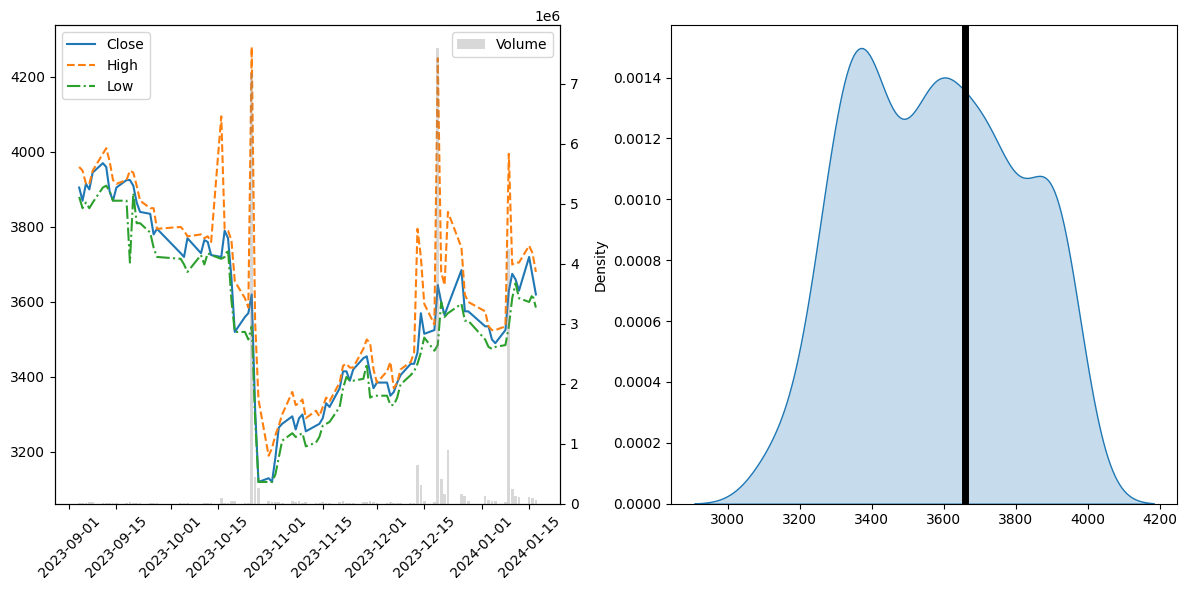

In [8]:
visualize_position(single_ohlcv, positions, price, time_size)

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

def visualize_position(df, positions, upper_limit, lower_limit, time_size):
    _df = df.tail(time_size)
    #
    fig = plt.figure(figsize=(12, 6))
    gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])
    #
    ax1 = plt.subplot(gs[0])
    ax1.plot(_df.index, _df["close"], label="Close")
    ax1.plot(_df.index, _df["high"], label="High", linestyle="--")
    ax1.plot(_df.index, _df["low"], label="Low", linestyle="-.")
    ax1.legend(loc="upper left")
    plt.xticks(rotation=45)
    #
    ax2 = ax1.twinx()
    ax2.bar(
        _df.index,
        _df["volume"],
        label="Volume",
        alpha=0.3,
        color="grey",
    )
    ax2.legend(loc="upper right")
    #
    ax3 = plt.subplot(gs[1])
    sns.kdeplot(positions, fill=True, ax=ax3)
    ax3.axvline(upper_limit,linewidth=5,color='r')
    ax3.axvline(lower_limit,linewidth=5,color='b')
    plt.tight_layout()
    plt.show()
    return None

In [10]:
upper_limit, lower_limit = pl_model.calc(positions)

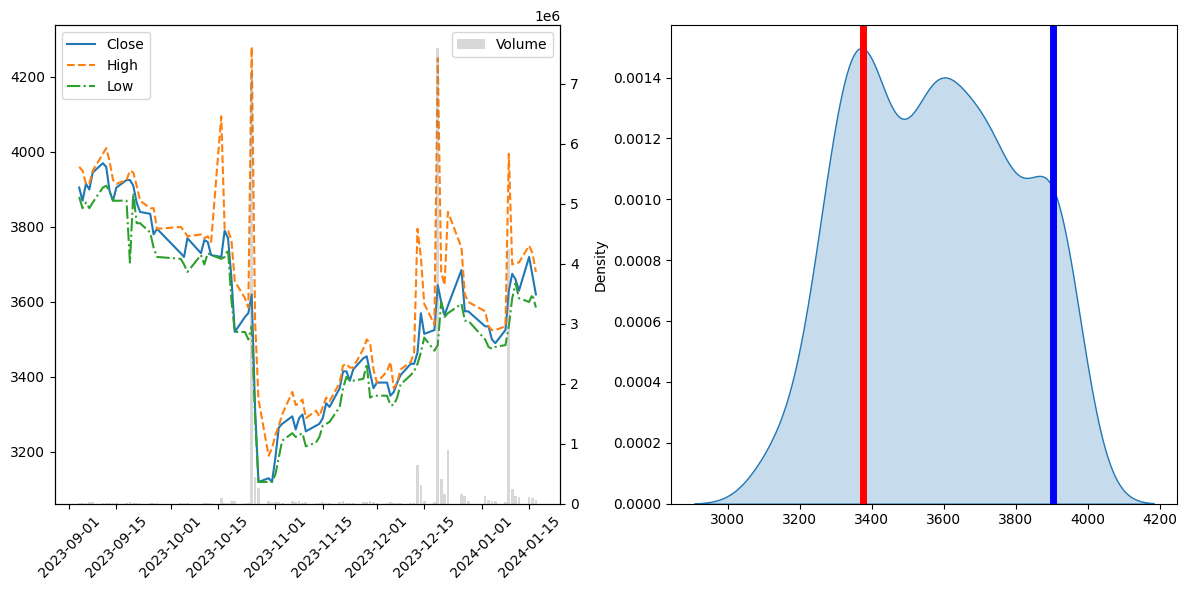

In [11]:
visualize_position(single_ohlcv, positions, upper_limit, lower_limit, time_size)